<a href="https://colab.research.google.com/github/mbilalrehmani/yolothermal/blob/main/Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/yolov5/dataset/train
!rm -rf /content/yolov5/dataset/valid
!rm -rf /content/yolov5/data/model.yaml
!rm -rf /content/test
!rm -rf /content/yolov5/runs/train/exp
!rm -rf /content/yolov5/runs/train/exp2
!rm -rf /content/yolov5/runs/train/exp3

In [ ]:
#!curl -L "https://public.roboflow.com/ds/j3WOxPeVRi?key=4RhHJFfls7" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [2]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.9 MB/s eta 0:09:50tcmalloc: large alloc 1147494400 bytes == 0x561ce8b04000 @  0x7f0e5c7e2615 0x561c8367b17c 0x561c8375b47a 0x561c8367df9d 0x561c8376fd4d 0x561c836f1ec8 0x561c836eca2e 0x561c8367f88a 0x561c836f1d30 0x561c836eca2e 0x561c8367f88a 0x561c836ee719 0x561c83770b76 0x561c836edd95 0x561c83770b76 0x561c836edd95 0x561c83770b76 0x561c836edd95 0x561c8367fce9 0x561c836c3579 0x561c8367e902 0x561c836f1c4d 0x561c836eca2e 0x561c8367f88a 0x561c836ee719 0x561c836eca2e 0x561c8367f88a 0x561c836ed8f6 0x561c8367f7aa 0x561c836edb4f 0x561c836eca2e
     |█████████████████               | 1055.7 MB 1.6 MB/s eta 0:09:47tcmalloc: large alloc 1434370048 bytes == 0x561c8632c000 @  0x7f0e5c7e2615 0x561c8367b17c 0x561c8375b47a 0x561c8367df9d 0x561c8376fd4d 0x561c836f1ec8 0x561c836eca2e 0x561c8367f88a 0x561c836f1d30 0x561c836eca2e 0x561c8367f88a 0x561c836ee719 0x561c83770b76 0x561c8

In [3]:
#!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11854, done.
remote: Total 11854 (delta 0), reused 0 (delta 0), pack-reused 11854
Receiving objects: 100% (11854/11854), 11.40 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (8213/8213), done.


In [4]:
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import shutil

In [7]:
#shutil.move("/content/data.yaml", "/content/yolov5/data")

'/content/yolov5/data/data.yaml'

In [8]:
!ls

CONTRIBUTING.md  Dockerfile  models	       train.py
data		 export.py   README.md	       tutorial.ipynb
dataset		 hubconf.py  requirements.txt  utils
detect.py	 LICENSE     setup.cfg	       val.py


In [6]:
!rm -rf /content/yolov5/runs/train/exp
!rm -rf /content/yolov5/runs/train/exp2

In [29]:
!python train.py --img 320 --batch 10 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=10, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-62-ga0a4adf torch 1.8.1+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, 

In [30]:
import torch
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

In [38]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp4/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-3-25 torch 1.8.1+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


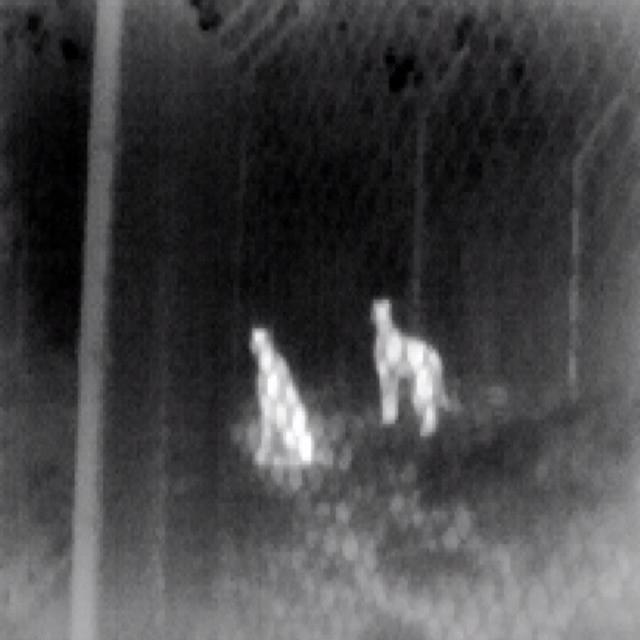

In [39]:
image = cv2.imread("/content/drive/MyDrive/thermal_chetah/test/images/PIR-206_13_mov-9_jpg.rf.0d325a875aa2d4a38c668a692e426aff.jpg")
normed = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(image)

image 1/1: 640x640 2 cheetahs
Speed: 3.5ms pre-process, 35.4ms inference, 3.7ms NMS per image at shape (1, 3, 640, 640)


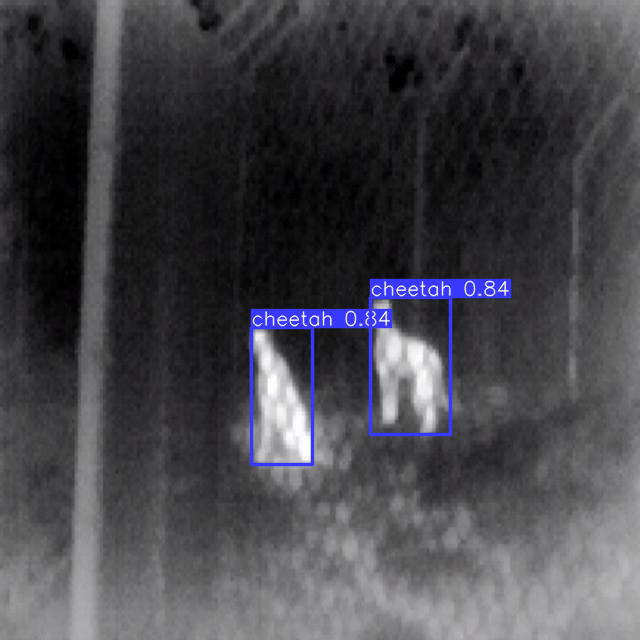

In [40]:
result = model(image)
result.print()

cv2_imshow(np.squeeze(result.render()))

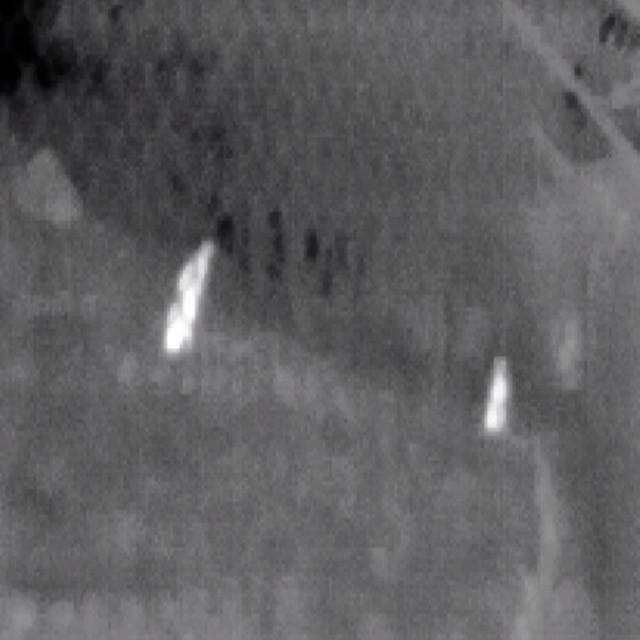

In [34]:
image = cv2.imread("/content/drive/MyDrive/thermal_chetah/test/images/PIR-206_19_mov-12_jpg.rf.ef3ee2787d9556cc6bed488357bb374b.jpg")
normed = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(image)

image 1/1: 640x640 2 cheetahs
Speed: 4.3ms pre-process, 34.5ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)


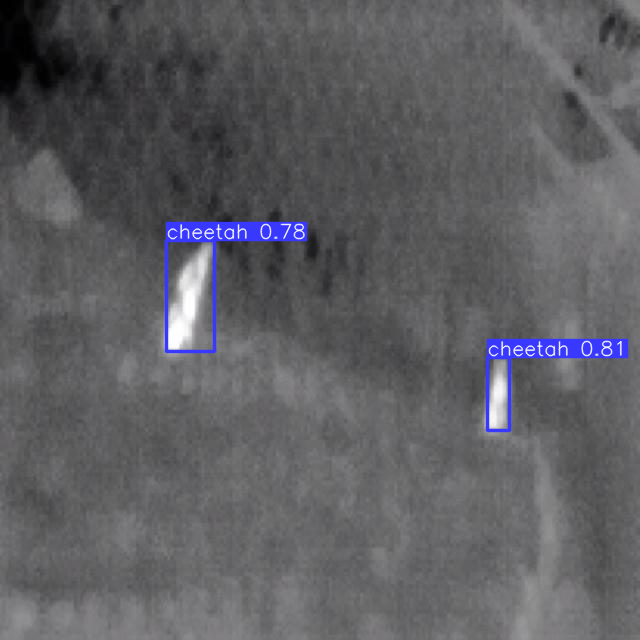

In [35]:
result = model(image)
result.print()

cv2_imshow(np.squeeze(result.render()))

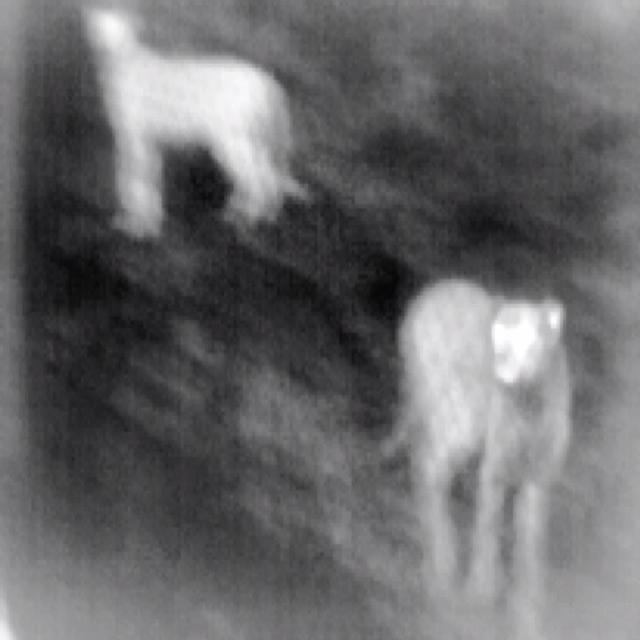

In [36]:
image = cv2.imread("/content/drive/MyDrive/thermal_chetah/test/images/PIR-206_8_mov-3_jpg.rf.382b182d742e0c019196ede4e243caf5.jpg")
normed = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(image)

image 1/1: 640x640 1 cheetah
Speed: 4.1ms pre-process, 33.7ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)


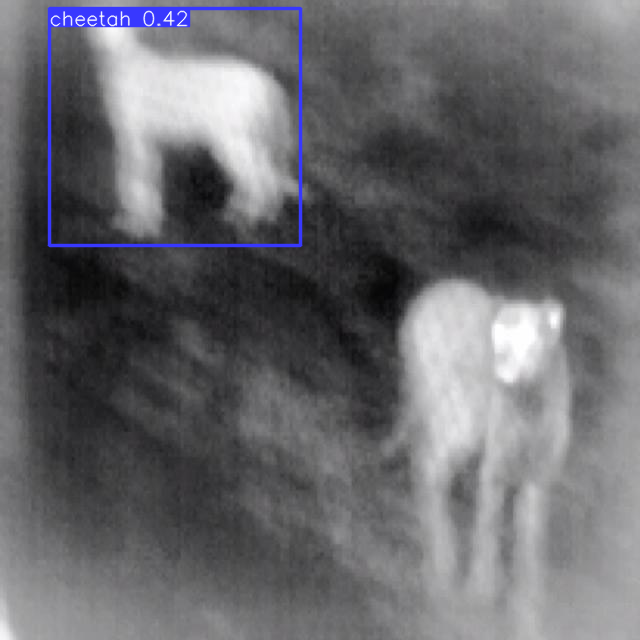

In [37]:
result = model(image)
result.print()

cv2_imshow(np.squeeze(result.render()))